In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('train_news.csv')

In [3]:
df=pd.DataFrame(ds)

In [4]:
df.head()

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [5]:
#removing the unwanted columns
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [6]:
df.columns

Index(['headline', 'written_by', 'news', 'label'], dtype='object')

In [7]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('max_colwidth', -1)

In [8]:
df.head()

headline  \
0  Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times                   
1  U.S. Must Dig Deep to Stop Argentina’s Lionel Messi - The New York Times                               
2  Cotton to House: ’Do Not Walk the Plank and Vote for a Bill that Cannot Pass the Senate’ - Breitbart   
3  Paul LePage, Besieged Maine Governor, Sends Conflicting Signals Over Intentions - The New York Times   
4  A Digital 9/11 If Trump Wins                                                                           

                   written_by  \
0  Eric Lipton and Steve Eder   
1  David Waldstein              
2  Pam Key                      
3  Jess Bidgood                 
4  Finian Cunningham            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [9]:
#checking the shape of the dataset
df.shape

(20800, 4)

In [10]:
#checking the column information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   headline    20242 non-null  object
 1   written_by  18843 non-null  object
 2   news        20761 non-null  object
 3   label       20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


In [11]:
#checking the null values
df.isnull().sum()

headline      558 
written_by    1957
news          39  
label         0   
dtype: int64

In [12]:
#We are droping the writtne_by column for the news prediction
df.drop(['written_by'],axis=1,inplace=True)

In [13]:
#removing null rows
df=df.dropna()

In [14]:
df.isnull().sum()

headline    0
news        0
label       0
dtype: int64

Now No null values in this dataset

In [15]:
df.shape

(20203, 3)

In [16]:
#convert to lowercase
df['headline'] = df['headline'].apply(lambda x: x.lower())
df['news'] = df['news'].apply(lambda x: x.lower())


In [17]:
#Removing Punctuation
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['headline'] = df['headline'].apply(punctuation_removal)
df['news'] = df['news'].apply(punctuation_removal)

In [18]:
#removing Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['headline'] = df['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['news'] = df['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Atirek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


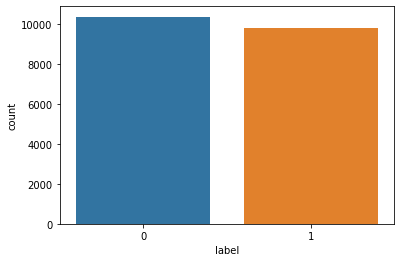

In [19]:
sns.countplot(df.label)

In [20]:
df.label.value_counts()

0    10387
1    9816 
Name: label, dtype: int64

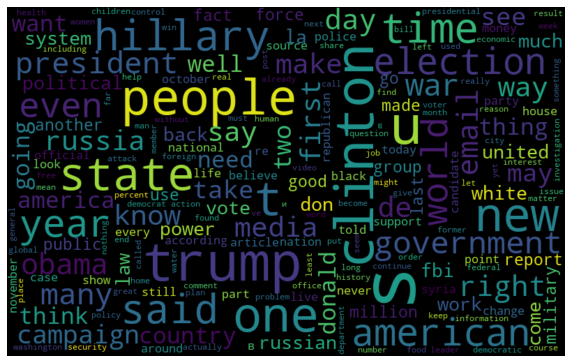

In [21]:
#word cloud for fake news
from wordcloud import WordCloud

fake_data = df[df["label"] == 1]
all_words = ' '.join([text for text in fake_data.news])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

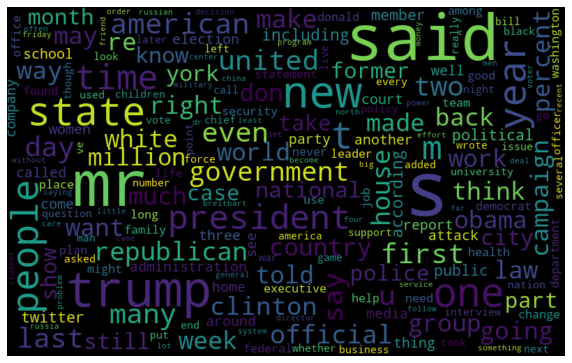

In [22]:
#word cloud for real news
from wordcloud import WordCloud

fake_data = df[df["label"] == 0]
all_words = ' '.join([text for text in fake_data.news])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
#count vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=10000)
cv_headline=cv.fit_transform(df.headline).todense()

In [24]:
cv_headline

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
cv_news=cv.fit_transform(df.news).todense()

In [26]:
cv_news

matrix([[5, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
x=np.hstack((cv_headline,cv_news))
y=df.label

In [28]:
x.shape,y.shape

((20203, 20000), (20203,))

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16162, 20000), (4041, 20000), (16162,), (4041,))

# Modeling

In [31]:
#logisticRegression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_y=lg.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,pred_y))
print('\n')
print(confusion_matrix(y_test,pred_y))
print('\n')
print(classification_report(y_test,pred_y))


0.9764909675822816


[[2037   59]
 [  36 1909]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2096
           1       0.97      0.98      0.98      1945

    accuracy                           0.98      4041
   macro avg       0.98      0.98      0.98      4041
weighted avg       0.98      0.98      0.98      4041



In [32]:
#crossvalidation
from sklearn.model_selection import cross_val_score,GridSearchCV
score=cross_val_score(lg,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.97500619 0.97253155 0.97451126 0.97549505 0.97326733]
0.9741622748020905
0.0011018580773513313


In [33]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_y=dt.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,pred_y))
print('\n')
print(confusion_matrix(y_test,pred_y))
print('\n')
print(classification_report(y_test,pred_y))

0.9621380846325167


[[2010   86]
 [  67 1878]]


              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2096
           1       0.96      0.97      0.96      1945

    accuracy                           0.96      4041
   macro avg       0.96      0.96      0.96      4041
weighted avg       0.96      0.96      0.96      4041



In [34]:
from sklearn.model_selection import cross_val_score,GridSearchCV
score=cross_val_score(dt,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.96461272 0.96288048 0.96362287 0.96757426 0.96064356]
0.9638667764326545
0.0022681810063409622


In [35]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
pred_y=knn.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,pred_y))
print('\n')
print(confusion_matrix(y_test,pred_y))
print('\n')
print(classification_report(y_test,pred_y))

0.7663944568176194


[[1227  869]
 [  75 1870]]


              precision    recall  f1-score   support

           0       0.94      0.59      0.72      2096
           1       0.68      0.96      0.80      1945

    accuracy                           0.77      4041
   macro avg       0.81      0.77      0.76      4041
weighted avg       0.82      0.77      0.76      4041



In [36]:
#crossvalidation
from sklearn.model_selection import cross_val_score,GridSearchCV
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.75748577 0.76194011 0.75575353 0.75940594 0.76064356]
0.7590457831974734
0.002206008225594031


In [37]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_y=svc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,pred_y))
print('\n')
print(confusion_matrix(y_test,pred_y))
print('\n')
print(classification_report(y_test,pred_y))

0.961395694135115


[[1981  115]
 [  41 1904]]


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2096
           1       0.94      0.98      0.96      1945

    accuracy                           0.96      4041
   macro avg       0.96      0.96      0.96      4041
weighted avg       0.96      0.96      0.96      4041



In [38]:
#crossvalidation
from sklearn.model_selection import cross_val_score,GridSearchCV
score=cross_val_score(svc,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.95966345 0.96015838 0.96189062 0.96658416 0.95940594]
0.9615405092847815
0.0026664958996455755


In [39]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.01,n_estimators=100)
gb.fit(x_train,y_train)
pred_y=gb.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,pred_y))
print('\n')
print(confusion_matrix(y_test,pred_y))
print('\n')
print(classification_report(y_test,pred_y))

0.9319475377381836


[[1852  244]
 [  31 1914]]


              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2096
           1       0.89      0.98      0.93      1945

    accuracy                           0.93      4041
   macro avg       0.94      0.93      0.93      4041
weighted avg       0.94      0.93      0.93      4041



In [40]:
#crossvalidation
from sklearn.model_selection import cross_val_score,GridSearchCV
score=cross_val_score(gb,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.94011383 0.93912398 0.93838159 0.93811881 0.93143564]
0.9374347713167754
0.00307846404601153


Here in this dataset logistic regression is performing very well so we save the logisticregression model for further use

In [41]:
from sklearn.externals import joblib

In [42]:
joblib.dump(lg,'lg_model_fake_news_dataset.obj')

['lg_model_fake_news_dataset.obj']